<a href="https://colab.research.google.com/github/Kanchanasud/My-Performance/blob/main/games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/Area0')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/MyDrive/Area0


#Dataset

https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023?SELECT=GAMES.CSV&fbclid=IwAR0nZBKL5XTYesZ6MCnWZ9sHiXKjllqiD2IZBXrgPZMrsM69qCJpcMsnm94

##Data Description



#Open CSV file

In [91]:
#open CSV file
import pandas as pd

In [92]:
games_data = pd.read_csv('games.csv')
print(games_data.shape) #  shown number of (row, column)
games_data.head()

(1512, 14)


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


#Data Cleaning

In [93]:
games_data.columns #check columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

##Missing/Null Checking

In [94]:
games_data.isnull().any() #check missing , True = NaN , False = Not NaN

Unnamed: 0           False
Title                False
Release Date         False
Team                  True
Rating                True
Times Listed         False
Number of Reviews    False
Genres               False
Summary               True
Reviews              False
Plays                False
Playing              False
Backlogs             False
Wishlist             False
dtype: bool

In [95]:
games_data.dtypes #check data type

Unnamed: 0             int64
Title                 object
Release Date          object
Team                  object
Rating               float64
Times Listed          object
Number of Reviews     object
Genres                object
Summary               object
Reviews               object
Plays                 object
Playing               object
Backlogs              object
Wishlist              object
dtype: object

### ลบ Missing/Null จากคอลัมน์ Team

In [96]:
# Team  เรียกเฉพาะคอลัมน์เพื่อดูค่า NaN
games_data[games_data['Team'].isnull()]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1245,1245,NEET Girl Date Night,"Oct 21, 2022",NaN,2.7,21,21,['Visual Novel'],Your friend sets you up on a date with his NEE...,"['this sucked. ""Omg she is literally me"" is no...",106,1,44,42


In [97]:
games_data.dropna(subset=['Team'], inplace=True)  #ใช้ dropna ในการลบค่า Null ออกจาก DataFrame เพราะ ข้อมูลเป็นตัวอักษรและไม่ได้ใช้ในการวิเคราะห์
games_data.dropna

<bound method DataFrame.dropna of       Unnamed: 0                                    Title  Release Date  \
0              0                               Elden Ring  Feb 25, 2022   
1              1                                    Hades  Dec 10, 2019   
2              2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3              3                                Undertale  Sep 15, 2015   
4              4                            Hollow Knight  Feb 24, 2017   
...          ...                                      ...           ...   
1507        1507             Back to the Future: The Game  Dec 22, 2010   
1508        1508                        Team Sonic Racing  May 21, 2019   
1509        1509                           Dragon's Dogma  May 22, 2012   
1510        1510                          Baldur's Gate 3  Oct 06, 2020   
1511        1511                 The LEGO Movie Videogame  Feb 04, 2014   

                                                   Team  Rating T

In [98]:
games_data[games_data['Team'].isnull()]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist


In [99]:
games_data.isnull().any() #check missing , True = NaN , False = Not NaN

Unnamed: 0           False
Title                False
Release Date         False
Team                 False
Rating                True
Times Listed         False
Number of Reviews    False
Genres               False
Summary               True
Reviews              False
Plays                False
Playing              False
Backlogs             False
Wishlist             False
dtype: bool

### ลบ Missing/Null จากคอลัมน์ Rating

In [100]:
# Ratingเรียกเฉพาะคอลัมน์เพื่อดูค่า NaN
games_data[games_data['Rating'].isnull()]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1202,1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


In [101]:
# คำนวณค่าเฉลี่ยของข้อมูลที่มีอยู่แล้วในช่อง Rating เพราะ Rating เป็นข้อมูลตัวเลขที่จะนำมาใช้ในการวิเคราะดังนั้นการเอาค่าเฉลี่ยของขอมูลมาใส่ในช่อง NaN จึงเป็นหนึ่งในวิธีที่จะไม่ทำให้ตัวชุดข้อมูลเบี่ยงเบนมาก
Rating_mean =  round(games_data['Rating'].mean()) #เป็นฟังก์ชันที่ใช้สำหรับปัดเศษทศนิยมของตัวเลข เพื่อให้เหมาะสมกับรูปแบบที่ต้องการ
# แทนค่าว่างด้วยค่าเฉลี่ย
games_data['Rating'].fillna(Rating_mean, inplace=True)

In [102]:
Rating_clean = games_data #สร้างตัวแปรใหม่มารองรับ
Rating_clean.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [103]:
# Rating เรียกเฉพาะคอลัมน์เพื่อดูค่า NaN
games_data[games_data['Rating'].isnull()]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist


In [104]:
games_data.isnull().any() #check missing อีกรอบ , True = NaN , False = Not NaN

Unnamed: 0           False
Title                False
Release Date         False
Team                 False
Rating               False
Times Listed         False
Number of Reviews    False
Genres               False
Summary               True
Reviews              False
Plays                False
Playing              False
Backlogs             False
Wishlist             False
dtype: bool

ลบ Missing/Null จากคอลัมน์ Summary

In [105]:
# Summaryเรียกเฉพาะคอลัมน์เพื่อดูค่า NaN
games_data[games_data['Summary'].isnull()]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
649,649,Death Stranding 2,releases on TBD,['Kojima Productions'],4.0,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644


In [106]:
games_data.dropna(subset=['Summary'], inplace=True)  #ใช้ dropna ในการลบค่า Null ออกจาก DataFrame เพราะ ข้อมูลเป็นตัวอักษรและไม่ได้ใช้ในการวิเคราะห์
games_data.dropna

<bound method DataFrame.dropna of       Unnamed: 0                                    Title  Release Date  \
0              0                               Elden Ring  Feb 25, 2022   
1              1                                    Hades  Dec 10, 2019   
2              2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3              3                                Undertale  Sep 15, 2015   
4              4                            Hollow Knight  Feb 24, 2017   
...          ...                                      ...           ...   
1507        1507             Back to the Future: The Game  Dec 22, 2010   
1508        1508                        Team Sonic Racing  May 21, 2019   
1509        1509                           Dragon's Dogma  May 22, 2012   
1510        1510                          Baldur's Gate 3  Oct 06, 2020   
1511        1511                 The LEGO Movie Videogame  Feb 04, 2014   

                                                   Team  Rating T

In [107]:
# Summaryเรียกเฉพาะคอลัมน์เพื่อดูค่า NaN
games_data[games_data['Summary'].isnull()]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist


In [108]:
games_data.isnull().any() #check missing อีกรอบ , True = NaN , False = Not NaN

Unnamed: 0           False
Title                False
Release Date         False
Team                 False
Rating               False
Times Listed         False
Number of Reviews    False
Genres               False
Summary              False
Reviews              False
Plays                False
Playing              False
Backlogs             False
Wishlist             False
dtype: bool

In [109]:
games_data.dtypes #check data type อีกรอบ

Unnamed: 0             int64
Title                 object
Release Date          object
Team                  object
Rating               float64
Times Listed          object
Number of Reviews     object
Genres                object
Summary               object
Reviews               object
Plays                 object
Playing               object
Backlogs              object
Wishlist              object
dtype: object

#สร้าง Model

In [110]:
games_data.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

feature_cols = ['Title',
       'Number of Reviews','Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist']

X = games_data[feature_cols] # Features
y = games_data['Rating'] # Target variable

# แปลงคอลัมน์ 'Rating' เป็นจำนวนเต็ม
y = games_data['Rating'].astype(int)

#X = (X['Times Listed']).astype(int)
#X['Times Listed '] = label_encoder.fit_transform(X['Times Listed'])

# แปลงตัวแปรที่เป็นหมวดหมู่เป็นตัวเลข
label_encoder = LabelEncoder()
X['Title'] = label_encoder.fit_transform(X['Title'])
#X['Team '] = label_encoder.fit_transform(X['Team'])
#X['Times Listed '] = label_encoder.fit_transform(X['Times Listed'])
X['Number of Reviews'] = label_encoder.fit_transform(X['Number of Reviews'])
X['Summary'] = label_encoder.fit_transform(X['Summary'])
X['Reviews'] = label_encoder.fit_transform(X['Reviews'])
X['Plays'] = label_encoder.fit_transform(X['Plays'])
X['Playing'] = label_encoder.fit_transform(X['Playing'])
X['Backlogs'] = label_encoder.fit_transform(X['Backlogs'])
X['Wishlist'] = label_encoder.fit_transform(X['Wishlist'])

<ipython-input-111-ca6157c987d1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Title'] = label_encoder.fit_transform(X['Title'])
<ipython-input-111-ca6157c987d1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Number of Reviews'] = label_encoder.fit_transform(X['Number of Reviews'])
<ipython-input-111-ca6157c987d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [112]:
X.head()

,Title,Number of Reviews,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,250,183,292,207,28,179,218,266
1,375,98,56,910,53,178,358,191
2,970,268,895,814,88,105,354,104
3,1037,182,67,1054,71,328,221,7
4,402,267,18,304,53,104,462,101


In [113]:
y.head()

0    4
1    4
2    4
3    4
4    4
Name: Rating, dtype: int64

#Naive Bayes

###Accuracy

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Naive Bayes classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Naive Bayes classifier: {accuracy:.2%}")

Accuracy of Naive Bayes classifier: 57.95%


###10-fold cross validation and find the best parameters

In [123]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Create Naive Bayes classifier
model = GaussianNB()

# Define parameter grid
param_grid = {}

# Create GridSearchCV object
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')

# Fit GridSearchCV object on data
grid_search.fit(X, y)

# Print best parameters and mean cross-validated score
print("Best parameters:", grid_search.best_params_)
print(f"Mean cross-validated accuracy score: {grid_search.best_score_:.2%}")

# Instantiate classifier with best hyperparameters found in the grid search
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Naive Bayes classifier: {accuracy:.2%}")

Best parameters: {}
Mean cross-validated accuracy score: 54.90%
Accuracy of Naive Bayes classifier: 57.95%


###อธิบายผลลัพธ์ Naive Bayes
โมเดล Naive Bayes ที่สร้างขึ้นมามีความแม่นยำในการทำนายเทียบกับข้อมูลทดสอบอยู่ที่ 57.95%
และหลังจากทำการประเมินโมเดลด้วยวิธี cross-validation 10-fold พบว่าค่าความแม่นยำเฉลี่ยของโมเดลคือ 57.95%

#Decision Tree Classifier

###Accuracy

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split จะใช้สุ่มแบ่ง X และ y เป็นชุดข้อมูลฝึกและชุดข้อมูลทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) #test_size=0.2 คือ 20%
#กำหนด test_size เป็น 0.2 และกำหนด random_state เป็น 42 เพื่อให้การแบ่งชุดข้อมูลสามารถทำซ้ำได้และ shuffle เป็น True เพื่อสลับลำดับข้อมูลก่อนแบ่งชุด

#สร้างตัวแบบ Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# ฝึกโมเดล (training) ด้วยชุดข้อมูลสำหรับการฝึก
clf.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = clf.predict(X_test)

# คำนวณค่าความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of decision tree classifier: {accuracy:.2%}")

Accuracy of decision tree classifier: 69.87%


In [119]:

from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
# แบ่งข้อมูลเป็น training set และ testing set ด้วยสัดส่วน 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง Decision Tree Classifier object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifier ด้วย training data
dt.fit(X_train, y_train)

# ทำนาย class ของ testing data
y_pred = dt.predict(X_test)

# คำนวณค่า precision, recall, F1-score ของแต่ละ class
precision, recall, f1score, support = precision_recall_fscore_support(y_test, y_pred)

# แสดงผลค่า precision, recall, F1-score ของแต่ละ class
print("Precision of class 0: {:.2%}".format(precision[0]))
print("Precision of class 1: {:.2%}".format(precision[1]))

print("Recall of class 0: {:.2%}".format(recall[0]))
print("Recall of class 1: {:.2%}".format(recall[1]))

print("F1-score of class 0: {:.2%}".format(f1score[0]))
print("F1-score of class 1: {:.2%}".format(f1score[1]))



Precision of class 0: 0.00%
Precision of class 1: 8.00%
Recall of class 0: 0.00%
Recall of class 1: 11.11%
F1-score of class 0: 0.00%
F1-score of class 1: 9.30%


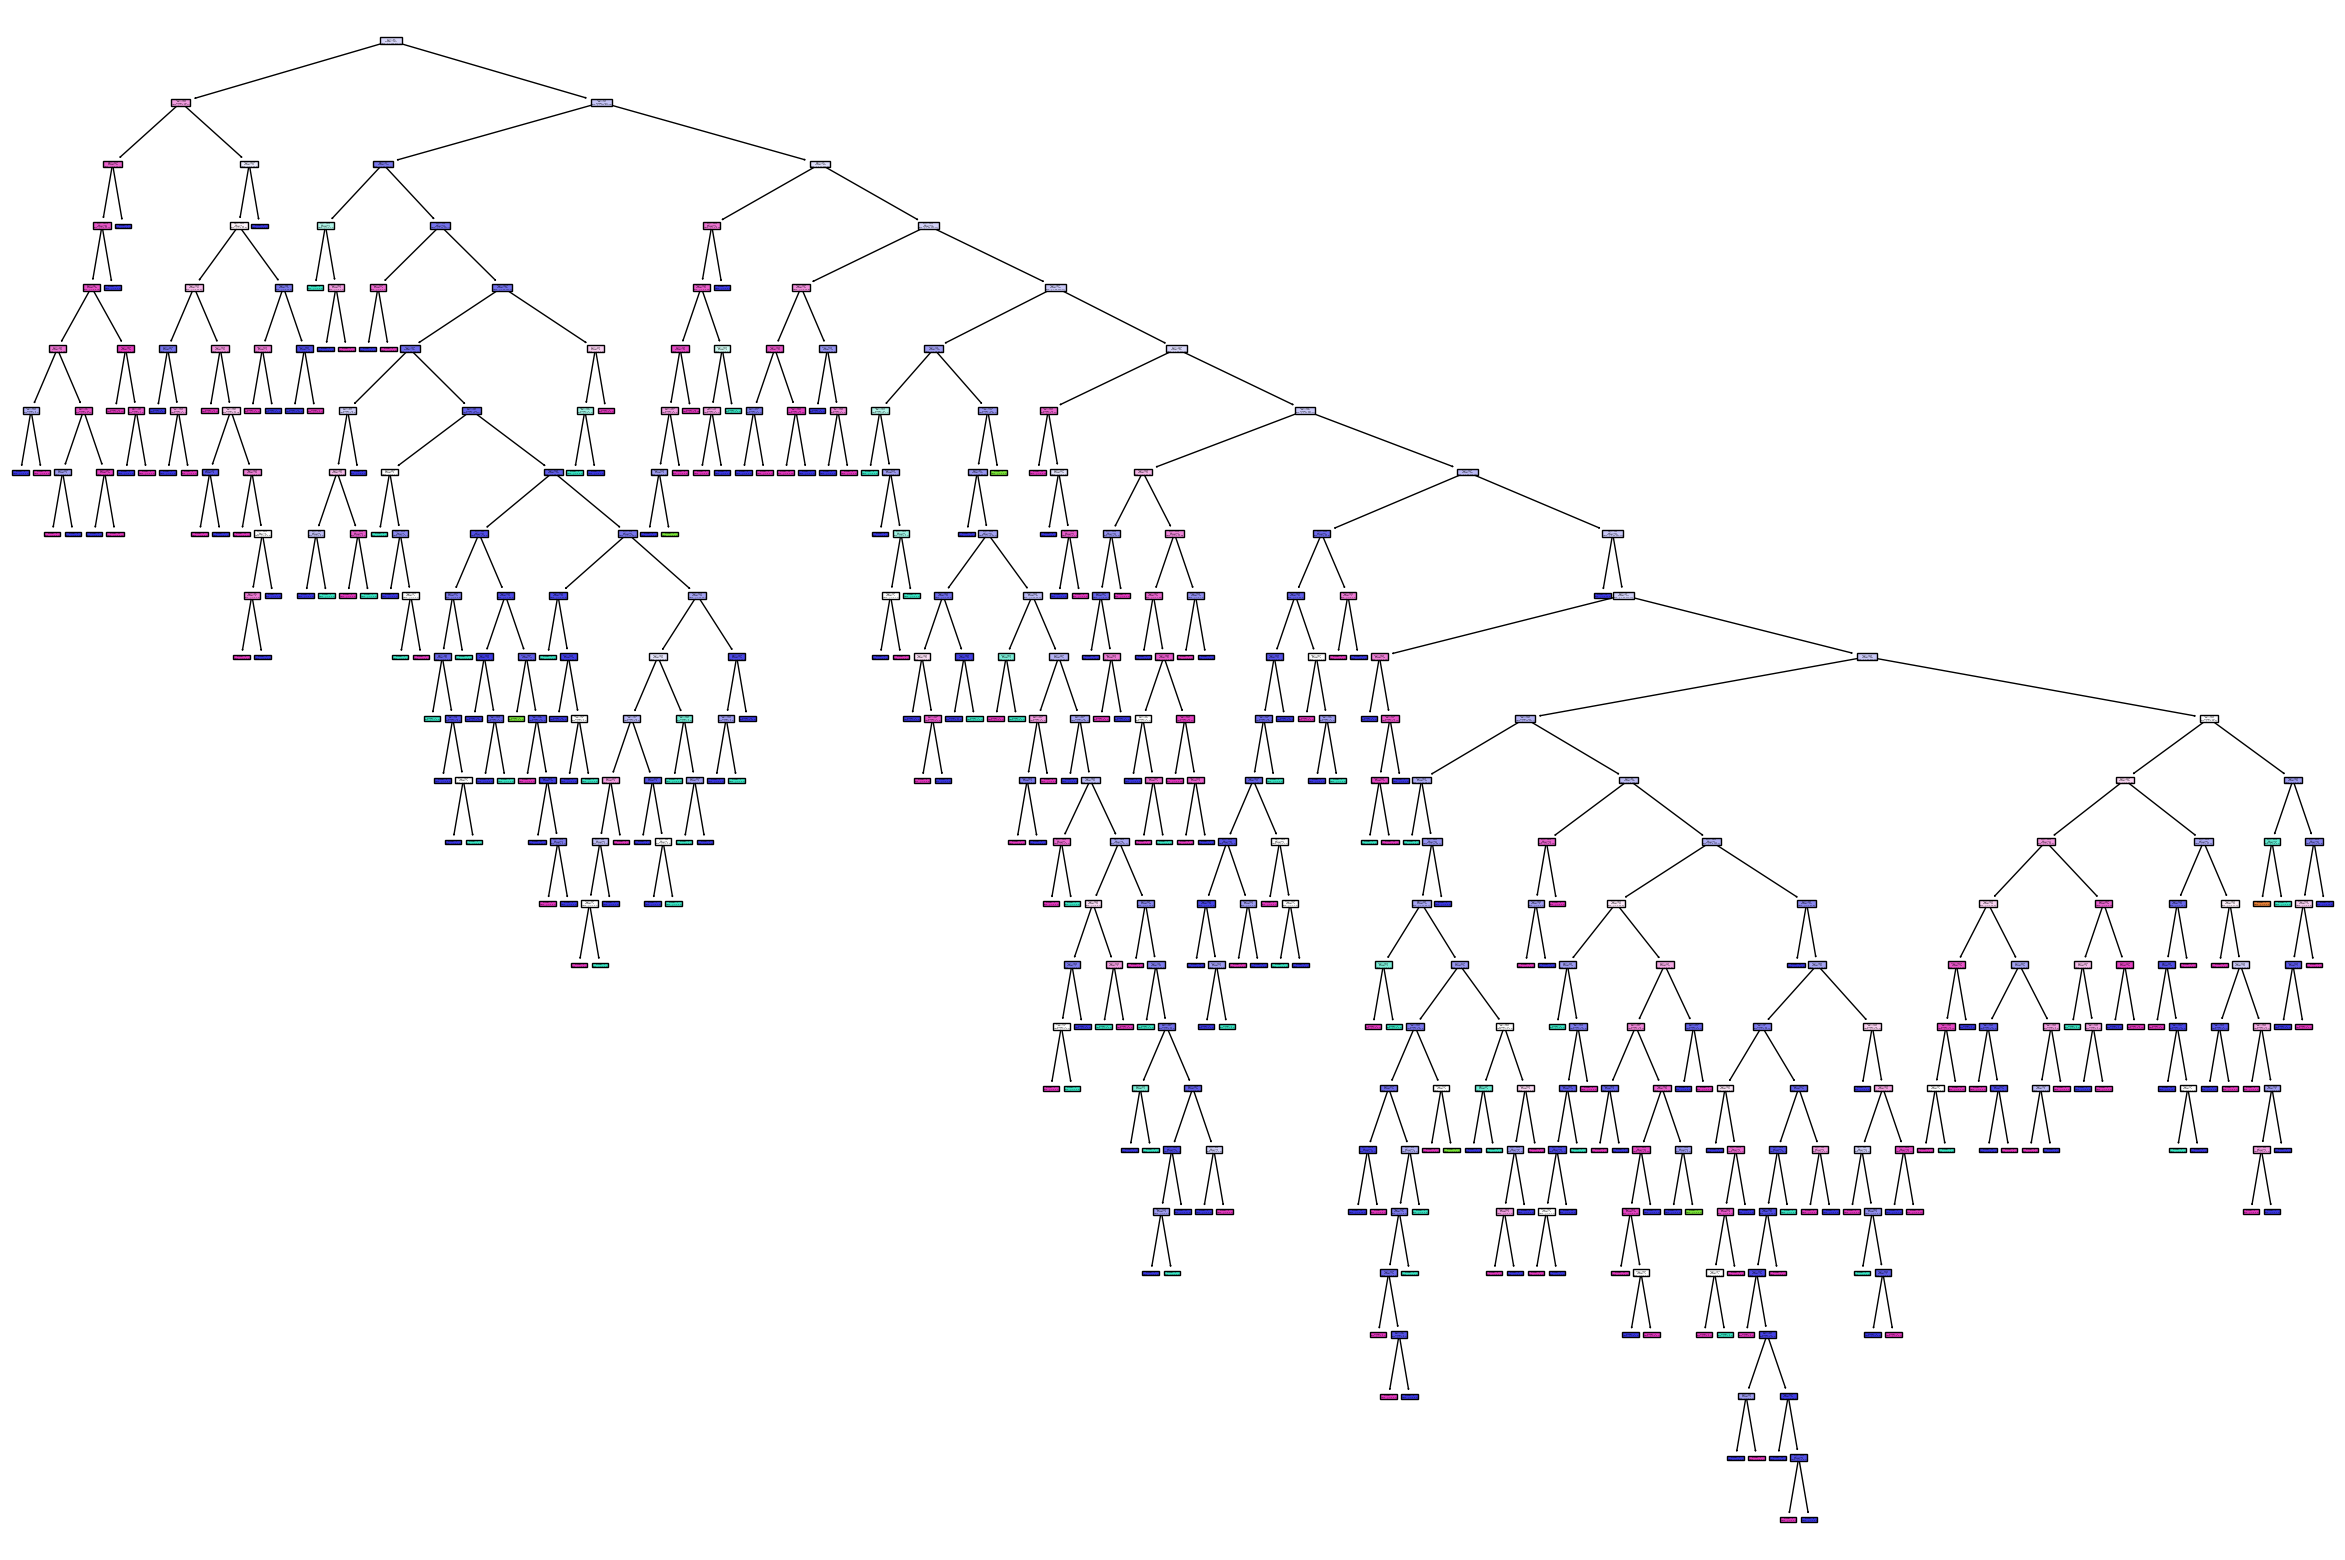

In [120]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plot the decision tree
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True)
plt.show()

##10-fold cross validation and find the best parameters

In [121]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']
}

# Instantiate classifier
clf = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy')

# Fit GridSearchCV object on data
grid_search.fit(X, y)

# Print best parameters and mean cross-validated score
print("Best parameters:", grid_search.best_params_)
print(f"Mean cross-validated accuracy score: {grid_search.best_score_:.2%}")

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1}
Mean cross-validated accuracy score: 65.89%


In [122]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']
}

# Instantiate the classifier
clf = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the mean cross-validated score
print("Best hyperparameters:", grid_search.best_params_)
print(f"Mean cross-validated accuracy score: {grid_search.best_score_:.2%}")

# Instantiate the classifier with the best hyperparameters found in the grid search
clf = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target variable using the trained classifier
y_pred = clf.predict(X_test)
# คำนวณค่าความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2%}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}
Mean cross-validated accuracy score: 64.98%
Accuracy : 73.18%


###อธิบายผลลัพธ์ Dicision Tree
ผลลัพธ์ที่ได้จะเห็นว่าโมเดล Decision Tree ที่สร้างขึ้นมีความแม่นยำในการทำนายผลของชุดข้อมูลทดสอบอยู่ที่ 69.87% ซึ่งมีค่าสูงกว่าค่าความแม่นยำที่ได้จากการทำ cross-validation และพารามิเตอร์ที่ดีที่สุดที่ค้นหาโดย GridSearchCV โดยค่าความแม่นยำที่ดีที่สุดที่ได้จาก cross-validation คือ 64.98% และเมื่อนำโมเดลที่สร้างขึ้นจากพารามิเตอร์ดังกล่าวมาใช้กับชุดข้อมูลสำหรับการทดสอบได้ค่าความแม่นยำอยู่ที่ 73.18 % ซึ่งมีค่าสูงกว่าค่าความแม่นยำที่ได้จาก cross-validation

#สรุปผล Model
โมเดล Decision Tree ที่ได้หลังจากทำการประเมินโมเดลด้วยวิธี cross-validation คือ 64.98% และเมื่อนำโมเดลที่สร้างขึ้นจากพารามิเตอร์ดังกล่าวมาใช้กับชุดข้อมูลสำหรับการทดสอบได้ค่าความแม่นยำอยู่ที่ 73.18 % สามารถทำนายได้ถูกต้องในระดับสูงกว่าโมเดล Naive Bayes